In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

C:\Users\mja04\AppData\Local\Temp\ipykernel_25128\2847474841.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the CSV file into a DataFrame
LCD = pd.read_csv('LCE.csv')

# Check for missing values in each column
missing_values = LCD.isnull().sum()
print(missing_values)

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


In [4]:
# Convert 'Male' to 1 and 'Female' to 0
LCD['GENDER'] = LCD['GENDER'].replace({'Male': 1, 'Female': 0})
print(LCD.head)

<bound method NDFrame.head of       GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        1               1        1              0   
1          0   55        1               0        0              1   
2          0   78        0               0        1              1   
3          1   60        0               1        1              1   
4          0   80        1               1        0              1   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        0               1        1              0   
2996       0   75        1               0        1              1   
2997       0   62        0               0        0              1   
2998       1   30        1               1        0              0   
2999       1   40        1               0        0              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   0        1        0         0        

In [5]:
# X: Features, Y: Target ('LUNG_CANCER')

# Select first 14 for features 
X = LCD.iloc[:,:14]  

# Select just the 15th column (index 14) Lung Cancer 0/1
Y = LCD.iloc[:, 15]  

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Print shapes of the resulting datasets to verify
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

print(X)

(2400, 14) (600, 14) (2400,) (600,)
      GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0          1   65        1               1        1              0   
1          0   55        1               0        0              1   
2          0   78        0               0        1              1   
3          1   60        0               1        1              1   
4          0   80        1               1        0              1   
...      ...  ...      ...             ...      ...            ...   
2995       0   71        0               1        1              0   
2996       0   75        1               0        1              1   
2997       0   62        0               0        0              1   
2998       1   30        1               1        0              0   
2999       1   40        1               0        0              1   

      CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  \
0                   0        1        0         0  

In [6]:
# We need to normalize the X features because of age however we wont do that until we get to models where it really matters such as KNN and SVM 

In [7]:
#First interation Random Forest

# Training the Random Forest classifier
RFC = RandomForestClassifier(n_estimators=12, max_depth=3, random_state=123)
RFC.fit(X_train, Y_train)

# Predict on the training data
clf_train_pred = RFC.predict(X_train)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(Y_train, clf_train_pred)
print(f'Accuracy on Training Data: {accuracy_train * 100:.2f}%')

#This is found to be our best model on the training data so far 


Accuracy on Training Data: 55.88%


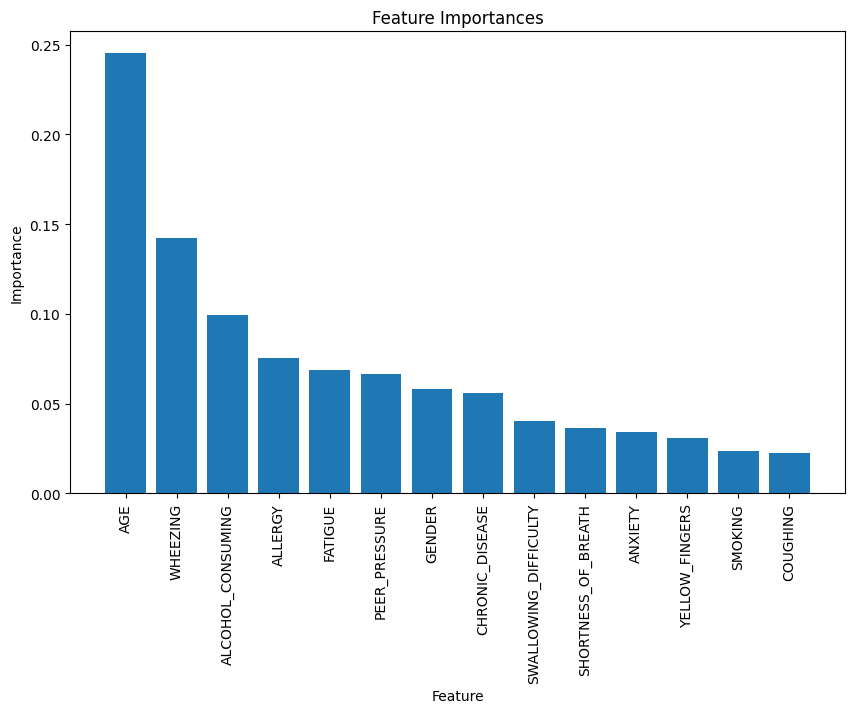

In [8]:
#ploting the features importances to get a better understanding of the variables.
importances = RFC.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(LCD.columns)[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


We can see from this graphic that age is a highly important factor when it comes to predicting lung cancer. However is this variables overshadowing the others? Could this be overfitting ?

In [10]:
#Training the model on test data for Random Forest to see difference in scores. 
RFC = RandomForestClassifier(n_estimators=12, max_depth=3, random_state=123)
RFC.fit(X_train, Y_train)

# Predict on the training data
RFC_pred = RFC.predict(X_test)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(Y_test, RFC_pred)
print(f'Accuracy on Training Data: {accuracy_train * 100:.2f}%')

# We achieved a mere 54% accuracy however there isnt much difference in accuracy between the training and test sets. 

Accuracy on Training Data: 54.00%


In [ ]:
from sklearn import preprocessing
 #normalizing training data for svm/knn
normalizer = preprocessing.Normalizer()
NTX = normalizer.fit_transform(X_train)
NTX

array([[0.03017858, 0.99589321, 0.03017858, ..., 0.03017858, 0.        ,
        0.03017858],
       [0.0153737 , 0.9992907 , 0.        , ..., 0.        , 0.        ,
        0.0153737 ],
       [0.        , 0.99904474, 0.01784008, ..., 0.01784008, 0.        ,
        0.01784008],
       ...,
       [0.02929794, 0.99612985, 0.02929794, ..., 0.02929794, 0.        ,
        0.        ],
       [0.01997206, 0.99860293, 0.01997206, ..., 0.        , 0.01997206,
        0.        ],
       [0.0203658 , 0.99792402, 0.0203658 , ..., 0.0203658 , 0.        ,
        0.        ]])

In [ ]:
#SVM on test 
modelSVC = SVC(probability = True)
modelSVC.fit(X_train, Y_train)
SVM_pred = modelSVC.predict(X_test)

accuracy = accuracy_score(Y_test, SVM_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# With the standarized data we only achieve an increase of about 6-8%. 
# 
# Should we be normalizing all of x train or only age?

Accuracy: 52.00%


In [ ]:
#Decision Tree model on test

dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, Y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, dt_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 52.17%


In [ ]:
#Gradient Boosting on train 

# Initialize Gradient Boosting model
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, Y_train)

# Make predictions on the test set
GB_pred = GBmodel.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(Y_train, GB_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 63.88%


In [ ]:
#Gradient Boosting on test 

# Initialize Gradient Boosting model
GBmodel = GradientBoostingClassifier()
GBmodel.fit(X_train, Y_train)

# Make predictions on the test set
GB_pred = GBmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, GB_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Here we recieve a bad score of only 49% accuracy for the model.

Accuracy: 49.83%


In [ ]:
#KNN Model on train 
knn = KNeighborsClassifier(n_neighbors=20)
# Train the model
knn.fit(X_train, Y_train)
# Make predictions on the test data
knn_pred = knn.predict(X_train)
# Evaluate the model
accuracy = accuracy_score(Y_train, knn_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Here we can see that on the training data the model performs pretty well with an accuracy of about 58%

Accuracy: 58.50%


In [ ]:
#KNN Model on test 
knn = KNeighborsClassifier(n_neighbors=20)
# Train the model
knn.fit(X_train, Y_train)
# Make predictions on the test data
knn_pred = knn.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, knn_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Here we again see that the accuracy of the model drops between training and test sets meaning the models arent doing a good job classifying the variables. 

Accuracy: 49.33%


In [ ]:
#Logistic Regression on training 
# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(max_iter=50, random_state=123)
LR_model.fit(X_train, Y_train)
# Make predictions on the training data
LR_pred = LR_model.predict(X_train)
# Evaluate the model
accuracy = accuracy_score(Y_train, LR_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Here we can see that we got only a 53.5% accruacy on this model. This model wont change accuracy when i change the max interation parameters.

Accuracy: 53.50%


In [ ]:
#Logistic Regression on test 
# Initialize and train the Logistic Regression model
LR_model = LogisticRegression(max_iter=50, random_state=123)
LR_model.fit(X_train, Y_train)
# Make predictions on the test data
LR_pred = LR_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(Y_test, LR_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#here we again see that the models accuracy is dropping by a good 3-4 percent while also already being a bad accuracy rate. 

Accuracy: 50.17%


In [ ]:
#currently this regression tree isnt working. 
#Regression Tree
#Initialize the DecisionTreeRegressor (Regression Tree)
#RT_model = DecisionTreeRegressor(random_state=42)
#RT_model.fit(X_train, Y_train)

# Make predictions on the test data
#RT_pred = RT_model.predict(X_test)

#accuracy = accuracy_score(Y_test, RT_pred)
#print(f'Accuracy: {accuracy * 100:.2f}%')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Correlation Matrix of Model Predictions:
                    DecisionTree       KNN  LogisticRegression  \
DecisionTree            1.000000  0.086356           -0.011585   
KNN                     0.086356  1.000000            0.188616   
LogisticRegression     -0.011585  0.188616            1.000000   
GradientBoosting        0.135951  0.328488            0.416928   
SVM                     0.080920  0.161458            0.252759   
RandomForest            0.144968  0.247271            0.487093   

                    GradientBoosting       SVM  RandomForest  
DecisionTree                0.135951  0.080920      0.144968  
KNN                         0.328488  0.161458      0.247271  
LogisticRegression          0.416928  0.252759      0.487093  
GradientBoosting            1.000000  0.167012      0.476296  
SVM                         0.167012  1.000000      0.351986  
RandomForest                0.476296  0.351986      1.000000  


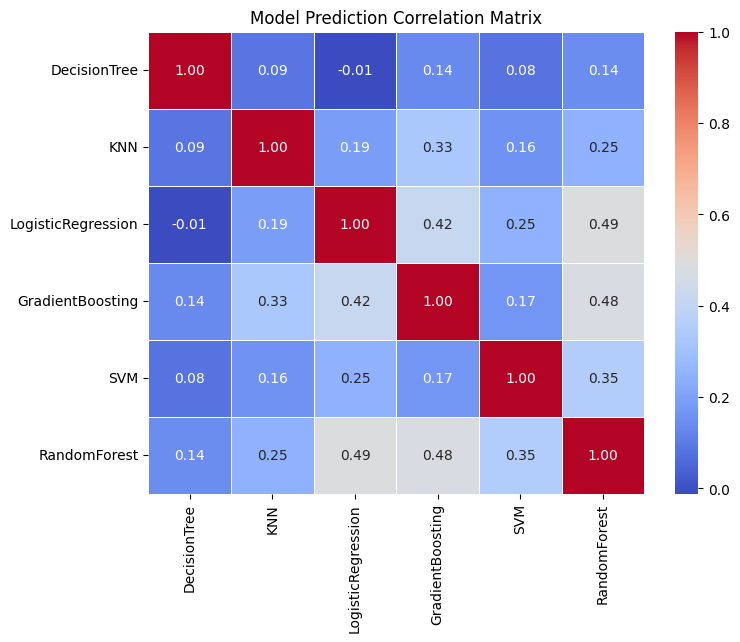

In [ ]:
import seaborn as sns

# Combine the predictions into a DataFrame for comparison
predictions_df = pd.DataFrame({
    'DecisionTree': dt_pred,
    'KNN': knn_pred,
    'LogisticRegression': LR_pred,
    'GradientBoosting': GB_pred,
    'SVM': SVM_pred,
    'RandomForest': RFC_pred
})

# Compute the correlation matrix of the model predictions
pred_corr_matrix = predictions_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Model Predictions:")
print(pred_corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pred_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Model Prediction Correlation Matrix')
plt.show()


Include decision tree as it seems pretty independant 
Maybe include SVM 
AS well as KNN

In [ ]:

from sklearn.ensemble import VotingClassifier

# Define individual models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
dt = DecisionTreeClassifier()
svm = SVC(probability=True)  # Enable probabilities for soft voting
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier()
#('gb', gb)
rf = RandomForestClassifier()
#lr = LogisticRegression()
#('gb', gb), , ('lr', lr), 


# Combine into a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('svm', svm), ('knn', knn),('rf', rf)],
    voting='soft'  # Use 'hard' for majority voting
)

# Train the ensemble
voting_clf.fit(X_train, Y_train)

# Evaluate the ensemble
print("Ensemble Accuracy:", voting_clf.score(X_test, Y_test))

#This model performed best with the following models decision tree , svm , knn, random forest. 

Ensemble Accuracy: 0.5133333333333333


In [ ]:
#Recursive Feature Elimination not fully completed need to adjust the code.

In [ ]:
#RFE on Logistic Regression

# Create an RFE selector and fit to training data
#rfe = RFE(estimator=LR_model, n_features_to_select=5)  # Keep 5 features
#rfe.fit(X_train, Y_train)


# Get the list of selected features
#selected_features = np.where(rfe.support_)[0]
#print("Indices of selected features:", selected_features)



# Train the model using the selected features
#X_train_selected = X_train[:, selected_features]
#X_test_selected = X_test[:, selected_features]

# Fit the model
#LR_model.fit(X_train_selected, Y_train)

# Make predictions
#LR_pred = LR_model.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
#accuracy = accuracy_score(Y_test, LR_pred)  # Or use other metrics for regression
#print("Model Accuracy with selected features:", accuracy)

Indices of selected features: [ 0  4  5  9 10]


InvalidIndexError: (slice(None, None, None), array([ 0,  4,  5,  9, 10], dtype=int64))

In [ ]:
#RFE on Random Forest
#Needs rebuilding 


# Create an RFE selector and fit to training data
#rfe = RFE(estimator=RFC, n_features_to_select=5)  # Keep 5 features
#rfe.fit(X_train, Y_train)


# Get the list of selected features
#selected_features = np.where(rfe.support_)[0]
#print("Indices of selected features:", selected_features)



# Train the model using the selected features
#X_train_selected = X_train[:, selected_features]?
#X_test_selected = X_test[:, selected_features]

# Fit the model
#RFC.fit(X_train_selected, Y_train)

# Make predictions
#clf_pred = RFC.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
#accuracy = accuracy_score(Y_test, clf_pred)  # Or use other metrics for regression
#print("Model Accuracy with selected features:", accuracy)

Indices of selected features: [ 1  5  8  9 13]


InvalidIndexError: (slice(None, None, None), array([ 1,  5,  8,  9, 13], dtype=int64))

In [ ]:
#RFE on Gradient Boosting


# Create an RFE selector and fit to training data
#rfe = RFE(estimator=GBmodel, n_features_to_select=5)  # Keep 5 features
#rfe.fit(X_train, Y_train)


# Get the list of selected features
#selected_features = np.where(rfe.support_)[0]
#print("Indices of selected features:", selected_features)



# Train the model using the selected features
#X_train_selected = X_train[:, selected_features]
#X_test_selected = X_test[:, selected_features]

# Fit the model
#GBmodel.fit(X_train_selected, Y_train)

# Make predictions
#GB_pred = GBmodel.predict(X_test_selected)

# Evaluate performance (accuracy for classification or MSE for regression)
#accuracy = accuracy_score(Y_test, GB_pred)  # Or use other metrics for regression
#print("Model Accuracy with selected features:", accuracy)

Indices of selected features: [ 1  6 11 12 13]


InvalidIndexError: (slice(None, None, None), array([ 1,  6, 11, 12, 13], dtype=int64))

In [ ]:
# Bagging

In [ ]:
#Bagging on Decision Tree Model

# Initialize Bagging with the base model for classification
DT_bagging_model = BaggingClassifier(estimator=dt_model, n_estimators=50, random_state=42)

# Train the Bagging model
DT_bagging_model.fit(X_train, Y_train)

# Predict on the test set
DT_pred = DT_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, DT_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")


Accuracy of Bagging Classifier: 1.00


In [ ]:
#Bagging on KNN

# Initialize Bagging with the base model for classification
KNN_bagging_model = BaggingClassifier(estimator=knn, n_estimators=50, random_state=42)

# Train the Bagging model
KNN_bagging_model.fit(X_train, Y_train)

# Predict on the test set
KNN_pred = KNN_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, KNN_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")

Accuracy of Bagging Classifier: 0.49


In [ ]:
#Bagging on SVM


# Initialize Bagging with the base model for classification
SVM_bagging_model = BaggingClassifier(estimator=modelSVC, n_estimators=50, random_state=42)

# Train the Bagging model
SVM_bagging_model.fit(X_train, Y_train)

# Predict on the test set
SVM_pred = SVM_bagging_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, SVM_pred)
print(f"Accuracy of Bagging Classifier: {accuracy:.2f}")

Accuracy of Bagging Classifier: 0.51
